# Определение перспективного тарифа для телеком-компании

**Описание проекта:** 

В нашем распоряжении данные компании "Мегалайн" — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Для проведения анализа нам были предоставлены 5 таблиц -- таблица users (информация о пользователях), таблица calls (информация о звонках), таблица messages (информация о сообщениях), таблица internet (информация об интернет-сессиях), таблица tariffs (информация о тарифах). 

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import math
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

В нашем распоряжении 5 таблиц: users, calls, messages, internet, tariffs. Рассмотрим каждую таблицу по отдельности. 

In [2]:
users = pd.read_csv('users.csv')
display(users.head())
display(users.info())
users.describe()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [3]:
calls = pd.read_csv('calls.csv')
display(calls.head())
display(calls.info())
calls.describe()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [4]:
messages = pd.read_csv('messages.csv')
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
internet = pd.read_csv('internet.csv')
display(internet.head())
display(internet.info())
internet.describe()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [6]:
tariffs = pd.read_csv('tariffs.csv')
display(tariffs.head())
display(tariffs.info())
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


### Вывод

После первого знакомства с данными, можно сделать выводы:

* Датасет содержит данные по 500 клиентам;
* Местами указан некорректный тип данных;
* Необходимо проверить данные на наличие дубликатов;
* Встречаются пропущенные значения в колонке churn_date в таблице users;
* Необходимо будет округлить значения минут разговора и мегабайт использованного трафика в большую сторону;
* Портрет среднестатистического пользователя, следующий: клиент в возрасте 46 лет, длительность звонка – 6-7 минут, объём потраченного за сессию интернет-трафика – 348 мегабайт.

Это только первоначальные наблюдения. Проведем подробную предобработку данных, чтобы выявить возможные аномалии. 

## Шаг 2. Подготовка данных

Для начала изменим тип данных в ряде колонок. Это нам поможет при дальнейшей обработке.

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

Проверим несколько колонок на наличие опечаток. 

In [8]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [9]:
users['tariff'].sort_values().unique()

array(['smart', 'ultra'], dtype=object)

In [10]:
tariffs['tariff_name'].sort_values().unique()

array(['smart', 'ultra'], dtype=object)

Проверим данные на наличие дубликатов.

In [11]:
print(users.duplicated().sum())
print(calls.duplicated().sum())
print(messages.duplicated().sum())
print(internet.duplicated().sum())
print(tariffs.duplicated().sum())

0
0
0
0
0


Пропущенные значения встречаются только в таблице users в колонке churn_date. Это не ошибка. Пропущенное значение говорит, что тариф ещё действует на момент выгрузки данных.

In [12]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

"Мегалайн" всегда округляет секунды до минут, а мегабайты — до гигабайта. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 

Округлим значения в таблицах **calls** до минут. Воспользуемся методом np.ceil. 

В данных встречаются звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

In [13]:
calls['duration'] = np.ceil(calls['duration'])

Теперь округлим значения в таблицах **internet** до гигабайта. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону. 

Для начала отсортируем данные в колонке mb_used, чтобы узнать минимально и максимальное значение. 

In [14]:
internet['mb_used'].value_counts().sort_index()

0.00       19598
0.03           1
0.04           1
0.06           1
0.07           2
           ...  
1623.92        1
1651.25        1
1651.55        1
1702.75        1
1724.83        1
Name: mb_used, Length: 70003, dtype: int64

В колонке встречаются нулевые значения. Предположим, что пользователи не успели воспользоваться интернетом. Не будем удалять эти значения. 

In [15]:
def internet_mb_used (mb):
    if mb == 0.00:
        return 0.00
    if 0.01 <= mb <= 1024.00:
        return 1.00
    if 1024.01 <= mb <= 2048.00:
        return 2.00
    return 3.00

In [16]:
internet['gb_used'] = internet['mb_used'].apply(internet_mb_used)
internet['gb_used'].value_counts().sort_index()

0.0     19598
1.0    127454
2.0      2344
Name: gb_used, dtype: int64

Готово. Мы округлили объём потраченного за сессию интернет-трафика до целого гигабайта.

**Рассчитаем для каждого пользователя:**

1. Количество сделанных звонков и израсходованных минут разговора по месяцам.

Для начала создадим новую колонку и внесем в нее номера месяцев. Данные предоставленные только за 2018 год, по этой причине мы можем воспользоваться методом .dt.month. 

In [17]:
calls['month'] = calls['call_date'].dt.month
calls.head(2)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8


Теперь мы можем определить количество сделанных звонков и израсходованных минут разговора по месяцам для каждого клиента. 

In [18]:
calls_total = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
calls_total.columns = ['calls_count', 'calls_sum']
calls_total.sort_index()

calls_count  calls_sum
user_id month                        
1000    5               22      159.0
        6               43      172.0
        7               47      340.0
        8               52      408.0
        9               58      466.0
...                    ...        ...
1498    10              41      247.0
1499    9                9       70.0
        10              68      449.0
        11              74      612.0
        12              69      492.0

[3174 rows x 2 columns]

2. Количество отправленных сообщений по месяцам. 

In [19]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [20]:
messages_total = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count'])
messages_total.columns = ['messages_count']
messages_total.sort_index()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

3. Объем израсходованного интернет-трафика по месяцам.  

In [21]:
internet['month'] = internet['session_date'].dt.month
internet.sort_index()

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used,month
0,0,1000_0,112.95,2018-11-25,1000,1.0,11
1,1,1000_1,1052.81,2018-09-07,1000,2.0,9
2,2,1000_2,1197.26,2018-06-25,1000,2.0,6
3,3,1000_3,550.27,2018-08-22,1000,1.0,8
4,4,1000_4,302.56,2018-09-24,1000,1.0,9
...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,1.0,10
149392,149392,1499_153,490.13,2018-12-14,1499,1.0,12
149393,149393,1499_154,0.00,2018-10-27,1499,0.0,10
149394,149394,1499_155,1246.32,2018-11-26,1499,2.0,11


In [22]:
internet_total = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])
internet_total.columns = ['internet_sum']
internet_total.sort_index()

internet_sum
user_id month              
1000    5           2253.49
        6          23233.77
        7          14003.64
        8          14055.93
        9          14568.91
...                     ...
1498    10         20579.36
1499    9           1845.75
        10         17788.51
        11         17963.31
        12         13055.58

[3203 rows x 1 columns]

Для удобства объединим все полученные таблицы в одну. Назовем ее **total_expenses**. 

In [23]:
total_expenses = pd.DataFrame()
total_expenses = calls_total.merge(messages_total, on = ['user_id', 'month'], how = 'outer')
total_expenses = total_expenses.merge(internet_total, on = ['user_id', 'month'], how = 'outer')
total_expenses.sort_index()

calls_count  calls_sum  messages_count  internet_sum
user_id month                                                      
1000    5             22.0      159.0            22.0       2253.49
        6             43.0      172.0            60.0      23233.77
        7             47.0      340.0            75.0      14003.64
        8             52.0      408.0            81.0      14055.93
        9             58.0      466.0            57.0      14568.91
...                    ...        ...             ...           ...
1498    10            41.0      247.0            42.0      20579.36
1499    9              9.0       70.0            11.0       1845.75
        10            68.0      449.0            48.0      17788.51
        11            74.0      612.0            59.0      17963.31
        12            69.0      492.0            66.0      13055.58

[3214 rows x 4 columns]

Так как изначально в таблицах было разное количество строк, проверим есть ли пропущенные значения после объединения трех таблиц в одну.  

In [24]:
total_expenses.isna().sum()

calls_count        40
calls_sum          40
messages_count    497
internet_sum       11
dtype: int64

В колонках встречаются пропуски. Заменим их на значение 0. 

In [25]:
total_expenses['calls_count'] = total_expenses['calls_count'].fillna(0)
total_expenses['calls_sum'] = total_expenses['calls_sum'].fillna(0)
total_expenses['messages_count'] = total_expenses['messages_count'].fillna(0)
total_expenses['internet_sum'] = total_expenses['internet_sum'].fillna(0)
total_expenses.isna().sum()

calls_count       0
calls_sum         0
messages_count    0
internet_sum      0
dtype: int64

Пропущенных значений нет. 

4. Помесячную выручку с каждого пользователя.

Объединим таблицы total_expenses и users. 

In [26]:
total_expenses = total_expenses.merge(users, on='user_id', how='right')
total_expenses.sort_values(by = 'user_id')

,user_id,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,47.0,340.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,52.0,408.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,58.0,466.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,41.0,247.0,42.0,20579.36,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
3214,1499,74.0,612.0,59.0,17963.31,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3212,1499,9.0,70.0,11.0,1845.75,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
3213,1499,68.0,449.0,48.0,17788.51,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


На этом этапе важно проверить количество уникальных пользователей, проверяя тем самым правильность работы merge. 

In [27]:
print(users['user_id'].nunique())
total_expenses['user_id'].nunique()

500


500

Проверим, превышают ли потребители стоимость пакета телекоммуникационных услуг. Другими словами, хватает ли им предоставленных минут, сообщений и гигабайт.

In [28]:
rub_monthly_fee_ultra = 1950 # ежемесячная плата по тарифу «Ультра»
rub_monthly_fee_smart = 550 # ежемесячная плата по тарифу «Смарт»

minutes_included_ultra = 3000 # количество минут по тарифу «Ультра»
minutes_included_smart = 500 # количество минут по тарифу «Смарт»

def total(row):
    tariff = row['tariff']
    calls_sum = row['calls_sum']
    if tariff == 'ultra':
        if calls_sum > minutes_included_ultra:
            return (calls_sum - minutes_included_ultra) * 1 + rub_monthly_fee_ultra
        return rub_monthly_fee_ultra
    if tariff == 'smart':
        if calls_sum > minutes_included_smart:
            return (calls_sum - minutes_included_smart) * 3 + rub_monthly_fee_smart
        return rub_monthly_fee_smart

In [29]:
total_expenses['calls_expenses'] = total_expenses.apply(total, axis=1)
total_expenses.head(2)

,user_id,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_expenses
0,1000,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,43.0,172.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


In [30]:
rub_monthly_fee_ultra = 1950 # ежемесячная плата по тарифу «Ультра»
rub_monthly_fee_smart = 550 # ежемесячная плата по тарифу «Смарт»

messages_included_ultra = 1000 # количество смс по тарифу «Ультра»
messages_included_smart = 50 # количество смс по тарифу «Смарт»

def total(row):
    tariff = row['tariff']
    messages_count = row['messages_count']
    if tariff == 'ultra':
        if messages_count > messages_included_ultra:
            return (messages_count - messages_included_ultra) * 1 + rub_monthly_fee_ultra
        return rub_monthly_fee_ultra
    if tariff == 'smart':
        if messages_count > messages_included_smart:
            return (messages_count - messages_included_smart) * 3 + rub_monthly_fee_smart
        return rub_monthly_fee_smart

In [31]:
total_expenses['messages_expenses'] = total_expenses.apply(total, axis=1)
total_expenses['messages_expenses'].head()

0    1950.0
1    1950.0
2    1950.0
3    1950.0
4    1950.0
Name: messages_expenses, dtype: float64

In [32]:
rub_monthly_fee_ultra = 1950 # ежемесячная плата по тарифу «Ультра»
rub_monthly_fee_smart = 550 # ежемесячная плата по тарифу «Смарт»

mb_included_ultra = 1024*30 # количество Гб по тарифу «Ультра» 30720
mb_included_smart = 1024*15 # количество Гб по тарифу «Ультра» 15360

rub_per_gb_ultra = 150 # стоимость 1 Гб интернет-трафика по тарифу «Ультра»
rub_per_gb_smart = 200 # стоимость 1 Гб интернет-трафика по тарифу «Смарт»

def total(row):
    tariff = row['tariff']
    internet_sum = row['internet_sum']
    if tariff == 'ultra':
        if internet_sum == 0:
            return 0
        if internet_sum > mb_included_ultra:
            return rub_per_gb_ultra + rub_monthly_fee_ultra
        return rub_monthly_fee_ultra
    if tariff == 'smart':
        if internet_sum == 0:
            return 0
        if internet_sum > mb_included_smart:
            return rub_per_gb_smart + rub_monthly_fee_smart
        return rub_monthly_fee_smart

In [33]:
total_expenses['internet_expenses'] = total_expenses.apply(total, axis=1)
total_expenses['internet_expenses'].head()

0    1950
1    1950
2    1950
3    1950
4    1950
Name: internet_expenses, dtype: int64

Рассчитаем помесячную выручку с каждого пользователя.

In [34]:
def total(row):
    tariff = row['tariff']
    calls_expenses = row['calls_expenses']
    messages_expenses = row['messages_expenses']
    internet_expenses = row['internet_expenses']
    if tariff == 'ultra':
        if (calls_expenses > messages_expenses) and (calls_expenses > internet_expenses):
            return calls_expenses
        if (messages_expenses > calls_expenses) and (messages_expenses > internet_expenses):
            return messages_expenses
        if internet_expenses > calls_expenses:
            return internet_expenses
        return internet_expenses
    if tariff == 'smart':
        if (calls_expenses > messages_expenses) and (calls_expenses > internet_expenses):
            return calls_expenses
        if (messages_expenses > calls_expenses) and (messages_expenses > internet_expenses):
            return messages_expenses
        if internet_expenses > calls_expenses:
            return internet_expenses
        return internet_expenses
    
total_expenses['total_price'] = total_expenses.apply(total, axis=1)
total_expenses['total_price'].head()

0    1950.0
1    1950.0
2    1950.0
3    1950.0
4    1950.0
Name: total_price, dtype: float64

Добавим колонку с месяцем. 

In [35]:
total_expenses['month'] = total_expenses['reg_date'].dt.month
total_expenses['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [36]:
total_price_table = total_expenses.pivot_table(index = ['user_id', 'month'], values = 'total_price', aggfunc = ['sum'])
total_price_table.columns = ['total_price_sum']
total_price_table.sort_values(by=['user_id'])

,,total_price_sum
user_id,month,
1000,5,15600.0
1001,11,1300.0
1002,6,4850.0
1003,8,9750.0
1004,5,15600.0
...,...,...
1495,8,10050.0
1496,1,9214.0
1497,10,1850.0


Готово. Мы провели тщательную предобработку данных, изменили типы данных, добавили новые колонки и рассчитали необходимые метрики. Теперь мы готовы приступить к анализу. 

## Шаг 3. Анализ данных

Рассмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Создадим таблицу medians и рассчитаем медиану.

In [37]:
medians = total_expenses.pivot_table(index='user_id', values=['calls_sum', 'messages_count', 'internet_sum'], aggfunc='median')
medians.head()

,calls_sum,internet_sum,messages_count
user_id,,,
1000,339.0,14312.42,65.0
1001,422.0,16233.00,0.0
1002,214.0,17580.10,11.0
1003,824.0,11356.89,83.0
1004,132.5,17810.53,154.5


Внесем в таблицу тарифные планы для каждого пользователя. 

In [38]:
users_tariff = users.loc[:, ['user_id', 'tariff']]
users_tariff.columns = ['user_id', 'tariff']
users_tariff.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


Объединим таблицы. 

In [39]:
medians = medians.merge(users_tariff, on = ['user_id'], how = 'left')
medians.head()

,user_id,calls_sum,internet_sum,messages_count,tariff
0,1000,339.0,14312.42,65.0,ultra
1,1001,422.0,16233.00,0.0,smart
2,1002,214.0,17580.10,11.0,smart
3,1003,824.0,11356.89,83.0,ultra
4,1004,132.5,17810.53,154.5,ultra


Дополнительно рассчитаем медиану для каждого тарифного плана. 

Для начала проанализируем потребителей тарифного плана **Ультра**. 

In [40]:
ultra_tariff_table = total_expenses[total_expenses['tariff'] == 'ultra']
print('Пользователь тарифа Ультра в среднем тратит', round(ultra_tariff_table['calls_sum'].mean(),1), 'минут')
print('Пользователь тарифа Ультра в среднем тратит', round(ultra_tariff_table['messages_count'].mean(),1), 'смс')
print('Пользователь тарифа Ультра в среднем тратит', round(ultra_tariff_table['internet_sum'].mean(),1), 'мб')

Пользователь тарифа Ультра в среднем тратит 526.6 минут
Пользователь тарифа Ультра в среднем тратит 49.4 смс
Пользователь тарифа Ультра в среднем тратит 19468.8 мб


Проанализируем потребителей тарифного плана **Смарт**. 

In [41]:
smart_tariff_table = total_expenses[total_expenses['tariff'] == 'smart']
print('Пользователь тарифа Смарт в среднем тратит', round(smart_tariff_table['calls_sum'].median(),1), 'минут')
print('Пользователь тарифа Смарт в среднем тратит', round(smart_tariff_table['messages_count'].median(),1), 'смс')
print('Пользователь тарифа Смарт в среднем тратит', round(smart_tariff_table['internet_sum'].median(),1), 'мб')

Пользователь тарифа Смарт в среднем тратит 422.0 минут
Пользователь тарифа Смарт в среднем тратит 28.0 смс
Пользователь тарифа Смарт в среднем тратит 16506.8 мб


**Вывод:** По проведенным расчетам можно составить среднестатистический портрет пользователей тарифных планов. Пользователи более дугового тарифа "Ультра" укладываются в предоставленные пакетом услуги. Они не беспокоятся, что в какой-то момент у него появится необходимость в дополнительных услугах. В свою очередь пользователям тарифа "Смарт" недостаточно предоставленного количества гигабайт, в связи с чем пользователям приходится их докупать.

Посчитаем среднее количество, дисперсию и стандартное отклонение для каждого тарифного плана. 

In [42]:
stat = np.round(medians.pivot_table(index='tariff',
                          values=['calls_sum', 'messages_count', 'internet_sum'],
                          aggfunc=('mean', np.var, np.std)), 2)
stat.columns = ['calls_mean', 'calls_var', 'calls_std', 'internet_mean', 'internet_var', 
                'internet_std', 'messages_mean', 'messages_var', 'messages_std']
stat

,calls_mean,calls_var,calls_std,internet_mean,internet_var,internet_std,messages_mean,messages_var,messages_std
tariff,,,,,,,,,
smart,437.47,160.27,25685.39,16831.94,4174.2,17423974.06,33.77,28.01,784.60
ultra,557.50,303.79,92290.58,20303.39,8893.0,79085500.25,56.98,49.24,2424.26


**Построим гистограммы.**

Разделим таблицу total_expenses на две по тарифным планам.

In [43]:
ultra_total_expenses = total_expenses[total_expenses['tariff'] == 'ultra']
smart_total_expenses = total_expenses[total_expenses['tariff'] == 'smart']

Перед построением гистограммы проверим данные на выбросы.

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_sum, dtype: float64

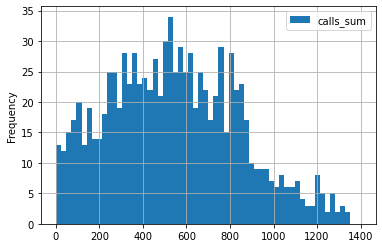

In [44]:
ultra_total_expenses.plot(y = 'calls_sum', kind = 'hist', bins = 60, grid = True, range = (1,1400))
ultra_total_expenses['calls_sum'].describe()

count      985.000000
mean     19468.805208
std      10087.170752
min          0.000000
25%      11770.260000
50%      19308.010000
75%      26837.690000
max      49745.690000
Name: internet_sum, dtype: float64

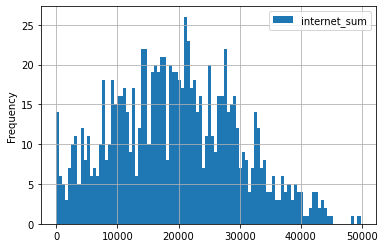

In [45]:
ultra_total_expenses.plot(y = 'internet_sum', kind = 'hist', bins = 100, grid = True)
ultra_total_expenses['internet_sum'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

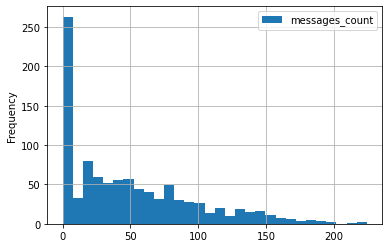

In [46]:
ultra_total_expenses.plot(y = 'messages_count', kind = 'hist', bins = 30, grid = True)
ultra_total_expenses['messages_count'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_sum, dtype: float64

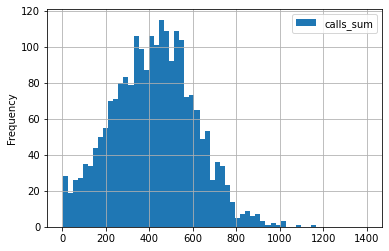

In [47]:
smart_total_expenses.plot(y = 'calls_sum', kind = 'hist', bins = 60, grid = True, range = (1,1400))
smart_total_expenses['calls_sum'].describe()

count     2229.000000
mean     16208.386990
std       5870.476681
min          0.000000
25%      12643.010000
50%      16506.840000
75%      20042.930000
max      38552.450000
Name: internet_sum, dtype: float64

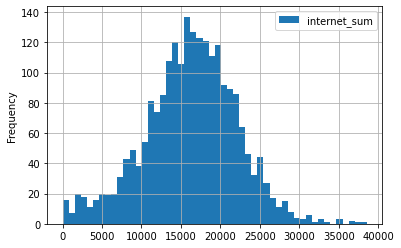

In [48]:
smart_total_expenses.plot(y = 'internet_sum', kind = 'hist', bins = 50, grid = True)
smart_total_expenses['internet_sum'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

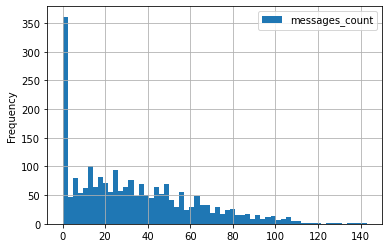

In [49]:
smart_total_expenses.plot(y = 'messages_count', kind = 'hist', bins = 60, grid = True)
smart_total_expenses['messages_count'].describe()

Выбросов не обнаружили. Перейдем к построению гистограмм.  

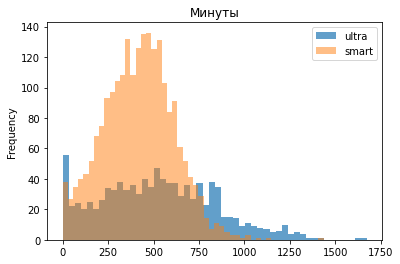

In [50]:
ultra_calls = total_expenses.loc[(total_expenses['tariff'] == 'ultra')]['calls_sum']
smart_calls = total_expenses.loc[(total_expenses['tariff'] == 'smart')]['calls_sum']
ultra_calls.plot(kind='hist', bins=50, alpha=0.7, legend='ultra', title = "Минуты")
smart_calls.plot(kind='hist', bins=50, alpha=0.5, legend='smart', title = "Минуты")  
plt.legend(['ultra', 'smart'])

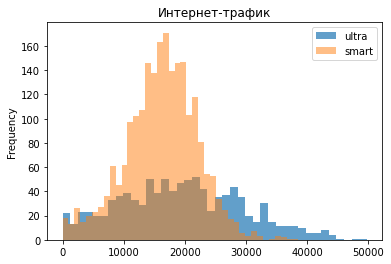

In [51]:
ultra_internet = total_expenses.loc[(total_expenses['tariff'] == 'ultra')]['internet_sum']
smart_internet = total_expenses.loc[(total_expenses['tariff'] == 'smart')]['internet_sum']
ultra_internet.plot(kind='hist', bins=40, alpha=0.7, legend='ultra', title = "Интернет-трафик")
smart_internet.plot(kind='hist', bins=40, alpha=0.5, legend='smart', title = "Интернет-трафик")  
plt.legend(['ultra', 'smart'])

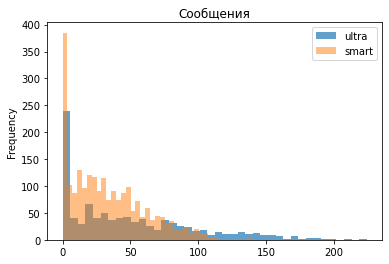

In [52]:
ultra_messages = total_expenses.loc[(total_expenses['tariff'] == 'ultra')]['messages_count']
smart_messages = total_expenses.loc[(total_expenses['tariff'] == 'smart')]['messages_count']
ultra_messages.plot(kind='hist', bins=40, alpha=0.7, legend='ultra', title = "Сообщения")
smart_messages.plot(kind='hist', bins=40, alpha=0.5, legend='smart', title = "Сообщения")  
plt.legend(['ultra', 'smart'])

**Вывод:** Анализ показал, что среднее, дисперсия и стандартное отклонение по тарифу "Ультра" больше, чем по тарифу "Смарт" по всем показателям: по длительности разговора, числу сообщений и использованным гигабайтам. Также можно заметить, что среднестатистическому пользователю тарифа "Смарт" недостаточно предоставленного количества гигабайт, в связи с чем пользователям приходится их докупать. В свою очередь среднестатистический пользователь тарифа "Ультра" не встречается с такой проблемой. Можно сказать, что пользователь этого тарифа чувствует себя более спокойно и уверенно, не беспокоится, что в какой-то момент у него появится необходимость в дополнительных телекоммуникационных услугах.   

## Шаг 4. Проверка гипотез 

Необходимо проверить гипотезы:
* средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Определим нулевую и альтернативную гипотезы для проверки первой поставленной гипотезы:
* средняя выручка пользователей тарифов "Ультра" и "Смарт" равны;
* средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.

In [53]:
ultra = total_expenses.query('tariff == "ultra"')['total_price']
smart = total_expenses.query('tariff == "smart"')['total_price']

alpha = .05

results = st.ttest_ind(
    ultra, 
    smart,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


In [54]:
total_expenses.pivot_table(index='tariff', values='total_price', aggfunc='mean')

,total_price
tariff,
smart,757.743498
ultra,1948.630832


**Вывод:** Мы обозначили две гипотезы: нулевая гипотеза -- Средняя выручка пользователей тарифов "Ультра" и "Смарт" равны; альтернативная гипотеза -- Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются. В ходе проверки мы отвергли нулевую гипотезу. Также мы выяснили, что среднее значения выручки по тарифному плану "Смарт" выше стоимости тарифа. Пользователи этого тарифного плана, скорее всего по итогам месяца заплатит больше из-за нехватки услуг в рамках тарифного пакета. Доходы компании "Мегалайн" с пользователей по тарифу "Ультра" действительно отличаются по сравнению с доходами от тарифа "Смарт". 

Вторая гипотеза звучит: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Проверим ее. Для начала определим нулевую и альтернативную гипотезы: 
* средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проведения проверки разделим таблицу на две: по Москве и по остальным городам.  

In [55]:
def region(city):
    if city == 'Москва':
        return 'Москва'
    else:
        return 'Другой город'
    
total_expenses['region'] = total_expenses['city'].apply(region)
total_expenses.pivot_table(index='region', values='total_price', aggfunc='mean')

,total_price
region,
Другой город,1104.492898
Москва,1201.168576


In [56]:
sample_1 = total_expenses[total_expenses['city'] == 'Москва']['total_price'] 
sample_2 = total_expenses[total_expenses['city'] != 'Москва']['total_price'] 

results = st.ttest_ind( sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.00029190842382105807
Принимаем альтернативную гипотезу


**Вывод:** Нами были обозначены две гипотезы: нулевая гипотеза -- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов; альтернативная гипотеза -- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. В ходе проверки мы отвергли нулевую гипотезу и приняли альтернативную гипотезу. Мы выяснили, что доходы в Московском регионе отличается от доходов в других населенных пунктов.

## Общий вывод

В наше распоряжение попали данные компании "Мегалайн" — федерального оператора сотовой связи. Компания предоставляет два тарифных плана "Смарт" и "Ультра". Перед нами была задача выяснить какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет. Проведя статистический анализ, мы пришли к выводу, что доходы от тарифа "Ультра" больше, чем от тарифа "Смарт": среднестатистический пользователь тарифа "Ультра" приносит компании в месяц 1950 рублей, тогда как другой оператор примерно 760 рубля.  

Мы обнаружили следующие нюансы тарифных планов:

•	Пользователям тарифа "Смарт" часто не хватает пакетных услуг, им приходится доплачивать за дополнительные гигабайты.

•	Пользователи тарифа "Ультра" не испытывает подобных проблем. Пользователи не обеспокоены вопросом нехватки телекоммуникационных услуг.

•	Средние доходы от пользователей в Москве практически не отличаются от доходов в других населенных пунктах. 